In [96]:
from cenpy import products
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import plotly.graph_objects as go

In [89]:
chicago = products.ACS(2017).from_place('Chicago, IL', level='tract', variables=['B02018'])

Matched: Chicago, IL to Chicago city within layer Incorporated Places


In [90]:
chicago_2015 = products.ACS(2015).from_place('Chicago, IL', level='tract', variables=['B02018'])

Matched: Chicago, IL to Chicago city within layer Incorporated Places


In [91]:
chicago_basemap, chicago_extent = ctx.bounds2img(*chicago.total_bounds, zoom=10, 
                                                        url=ctx.tile_providers.ST_TONER_LITE)

/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning:

invalid value encountered in less



Text(0.5, 1.0, 'Relative Change')

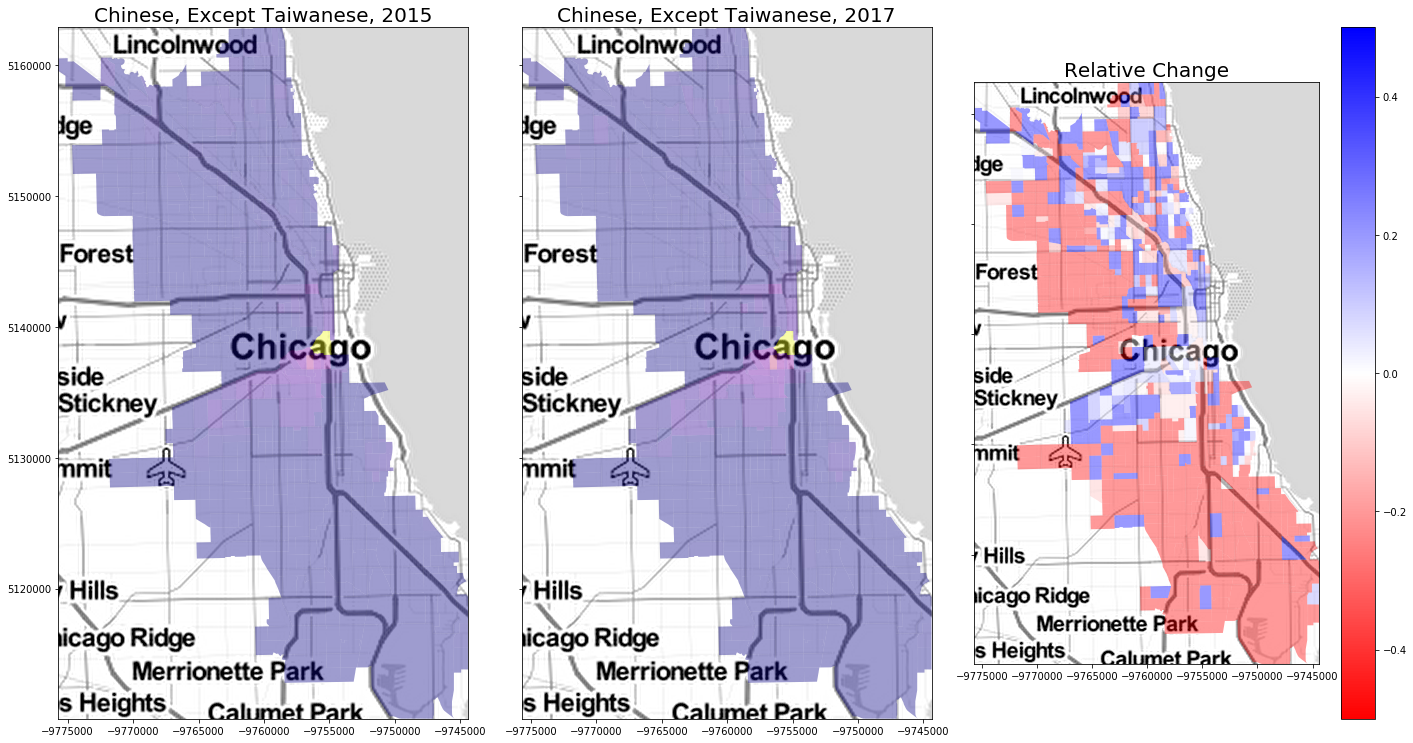

In [92]:
f,ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)
[ax_.imshow(chicago_basemap, extent=chicago_extent, interpolation='sinc') for ax_ in ax]
chicago.plot('B02018_007E', cmap='plasma', ax = ax[1], alpha=.4)
chicago_2015.plot('B02018_007E', cmap='plasma', ax = ax[0], alpha=.4)
chicago.merge(chicago_2015.drop('geometry',axis=1), on='GEOID', suffixes=('_2017', '_2015'))\
       .eval('pct_change = (B02018_007E_2017 - B02018_007E_2015)/(B02018_007E_2015)')\
       .plot('pct_change', cmap='bwr_r', ax=ax[2], alpha=.4, vmin=-.5, vmax=.5, legend=True)
f.tight_layout()
ax[0].axis(chicago.total_bounds[[0,2,1,3]])
ax[0].set_title('Chinese, Except Taiwanese, 2015', fontsize=20)
ax[1].set_title('Chinese, Except Taiwanese, 2017', fontsize=20)
ax[2].set_title('Relative Change', fontsize=20)

In [94]:
chicago = chicago.merge(chicago_2015.drop('geometry',axis=1), on='GEOID', suffixes=('_2017', '_2015'))

In [139]:
chicago['TRACT'] = chicago.apply(lambda x: int(x['tract_2017']), axis=1)

In [145]:
chicago = chicago.merge(community_area, on='TRACT')

In [142]:
ca_boundaries = gpd.read_file("Boundaries - Community Areas (current).geojson")

In [149]:
ca_boundaries['area_num_1'] = ca_boundaries.apply(lambda x: int(x['area_num_1']), axis=1)

In [151]:
chicago = chicago.merge(ca_boundaries.drop('geometry',axis=1), left_on='CHGOCA', right_on='area_num_1')

In [171]:
ca_totals = chicago.groupby('community')['B02018_001E_2017', 'B02018_001E_2015'].sum()

In [191]:
ca_totals = ca_totals.sort_values(by='B02018_001E_2017', ascending=False)

In [193]:
top_10 = ca_totals[:11]

In [196]:
cas = list(top_10.community)

fig = go.Figure(data=[
    go.Bar(name='2015', x=cas, y=list(top_10.B02018_001E_2015), marker_color='indianred'),
    go.Bar(name='2017', x=cas, y=list(top_10.B02018_001E_2017), marker_color='lightsalmon')
])
# Change the bar mode
fig.update_layout(barmode='group', title_text='Chinese, Except Taiwanese Population by Community Area')
fig.show()

In [197]:
c = products.ACS(2017).from_place('Chicago, IL', level='tract', variables=['B05006'])

KeyboardInterrupt: 